In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset_train = pd.read_csv("tsla_train.csv")
print(dataset_train.shape)
print(dataset_train.head())

(2142, 7)
         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


In [3]:
training_set = dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[ 19.      ]
 [ 25.790001]
 [ 25.      ]
 ...
 [319.839996]
 [323.100006]
 [337.790009]]
(2142, 1)


In [4]:
scaler = MinMaxScaler(feature_range=(0,1))

scaled_training_set = scaler.fit_transform(training_set)

print(scaled_training_set)

[[0.00771826]
 [0.02604237]
 [0.02391041]
 ...
 [0.81959248]
 [0.82839024]
 [0.86803402]]


In [6]:
x_train = []
y_train = []

for i in range(60,2142):
    x_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [7]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(2082, 60, 1)


In [8]:
regressor = Sequential()

regressor.add(LSTM(units = 50,return_sequences=True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [9]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=250,batch_size=32)


Epoch 1/250
66/66 [==============================] - 12s 61ms/step - loss: 0.0220
Epoch 2/250
66/66 [==============================] - 4s 60ms/step - loss: 0.0059
Epoch 3/250
66/66 [==============================] - 4s 59ms/step - loss: 0.0054
Epoch 4/250
66/66 [==============================] - 4s 58ms/step - loss: 0.0054
Epoch 5/250
66/66 [==============================] - 4s 59ms/step - loss: 0.0050
Epoch 6/250
66/66 [==============================] - 4s 58ms/step - loss: 0.0044
Epoch 7/250
66/66 [==============================] - 4s 58ms/step - loss: 0.0044
Epoch 8/250
66/66 [==============================] - 4s 59ms/step - loss: 0.0041
Epoch 9/250
66/66 [==============================] - 4s 59ms/step - loss: 0.0046
Epoch 10/250
66/66 [==============================] - 4s 59ms/step - loss: 0.0045
Epoch 11/250
66/66 [==============================] - 4s 59ms/step - loss: 0.0035
Epoch 12/250
66/66 [==============================] - 4s 59ms/step - loss: 0.0043
Epoch 13/250
66/66 [====

In [10]:
dataset_test = pd.read_csv("tsla_test.csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

In [11]:
dataset_total = pd.concat((dataset_train.iloc[:,1:2],dataset_test.iloc[:,1:2]),axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test = []

for i in range(60,335):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [12]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

9/9 [==============================] - 3s 23ms/step


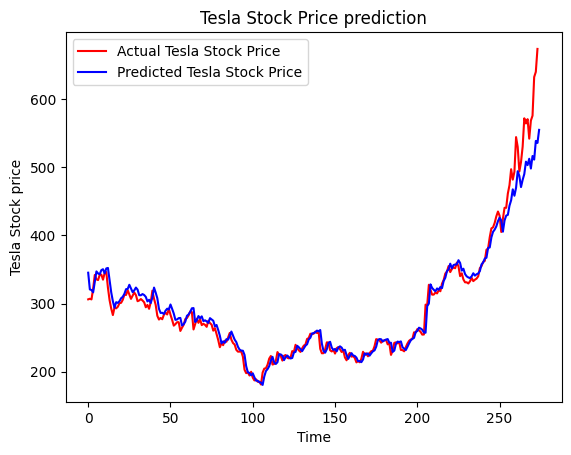

In [14]:
plt.plot(actual_stock_price,color = 'red',label = 'Actual Tesla Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock price')
plt.legend()
plt.show()